In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
num_time_steps=50
input_size=1
hidden_size=16
output_size=1 
lr=0.01

In [3]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        
        self.rnn=nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=1,
            batch_first=True
        )
        for p in self.rnn.parameters():
            nn.init.normal_(p,mean=0.0,std=0.001)
        
        self.linear=nn.Linear(hidden_size,output_size)
        
    def forward(self,x,hidden_prev):
        out,hidden_prev=self.rnn(x,hidden_prev)
        # [b, seq, h]
        out=out.view(-1,hidden_size)
        out=self.linear(out)
        out=out.unsqueeze(dim=0)
        
        return out,hidden_prev

In [4]:
model=Net()
criteon=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr)

hidden_prev=torch.zeros(1,1,hidden_size)

for iter in range(6000):
    start=np.random.randint(3,size=1)[0]
    time_steps=np.linspace(start,start+10,num_time_steps)
    
    data=np.sin(time_steps)
    data=data.reshape(num_time_steps,1)
    x=torch.tensor(data[:-1]).float().view(1,num_time_steps-1,1)
    y=torch.tensor(data[1:]).float().view(1,num_time_steps-1,1)
    
    output,hidden_prev=model(x,hidden_prev)
    hidden_prev=hidden_prev.detach()
    
    loss=criteon(output,y)
    model.zero_grad()
    loss.backward()
    # Gradient Clipping
#     for p in model.paramaters():
#         print(p.grad.norm())
#     torch.nn.utils.clip_grad_norm_(p,10)
    optimizer.step()
    
    if iter % 100 ==0:
        print('Iteration={} loss={}'.format(iter,loss.item()))

Iteration=0 loss=0.47940000891685486
Iteration=100 loss=0.008510861545801163
Iteration=200 loss=0.0009589878609403968
Iteration=300 loss=0.009883083403110504
Iteration=400 loss=0.00198404211550951
Iteration=500 loss=0.006550194229930639
Iteration=600 loss=0.0010130669688805938
Iteration=700 loss=0.0005218507722020149
Iteration=800 loss=0.00025030694087035954
Iteration=900 loss=0.00022797132260166109
Iteration=1000 loss=0.0003024058823939413
Iteration=1100 loss=0.0004765636404044926
Iteration=1200 loss=0.002410631161183119
Iteration=1300 loss=0.0004073843010701239
Iteration=1400 loss=0.0002904749126173556
Iteration=1500 loss=0.0007654873770661652
Iteration=1600 loss=0.0007459009066224098
Iteration=1700 loss=0.0003234698378946632
Iteration=1800 loss=0.0005296524032019079
Iteration=1900 loss=0.0005655269487760961
Iteration=2000 loss=0.0006897415150888264
Iteration=2100 loss=0.0016718984115868807
Iteration=2200 loss=0.0003761615662369877
Iteration=2300 loss=0.00034247752046212554
Iteration

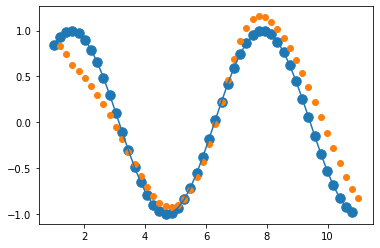

In [5]:
start = np.random.randint(3, size=1)[0]
time_steps = np.linspace(start, start + 10, num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps, 1)
x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1)
y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)

predictions=[]
input =x[:,0,:]
for _ in range(x.shape[1]):
    input=input.view(1,1,1)
    (pred,hidden_prev)=model(input,hidden_prev)
    input=pred
    predictions.append(pred.detach().numpy().ravel()[0])

x=x.data.numpy().ravel()
y=y.data.numpy()

plt.scatter(time_steps[:-1],x.ravel(),s=90)
plt.plot(time_steps[:-1],x.ravel())
plt.scatter(time_steps[1:],predictions)
plt.show()